In [3]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


Dataset shape: (1000, 10)
Dataset head:
    feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.768094  -1.062899  -1.502895        0.0        0.0        0.0   
1  -1.326407  -0.725706  -1.436839        0.0        0.0        0.0   
2  -0.870501  -0.944614  -0.796163        0.0        0.0        0.0   
3  -1.198228  -0.633996  -1.031985        0.0        0.0        0.0   
4  -0.581253  -0.839979  -0.762256        0.0        0.0        0.0   

   feature_6  feature_7  feature_8  feature_9  
0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0  

Running PCA...
PCA explained variance ratio for 2 components: 0.6883

Running t-SNE (this might take a while)...


C:\Users\user\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Running UMAP...


C:\Users\user\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


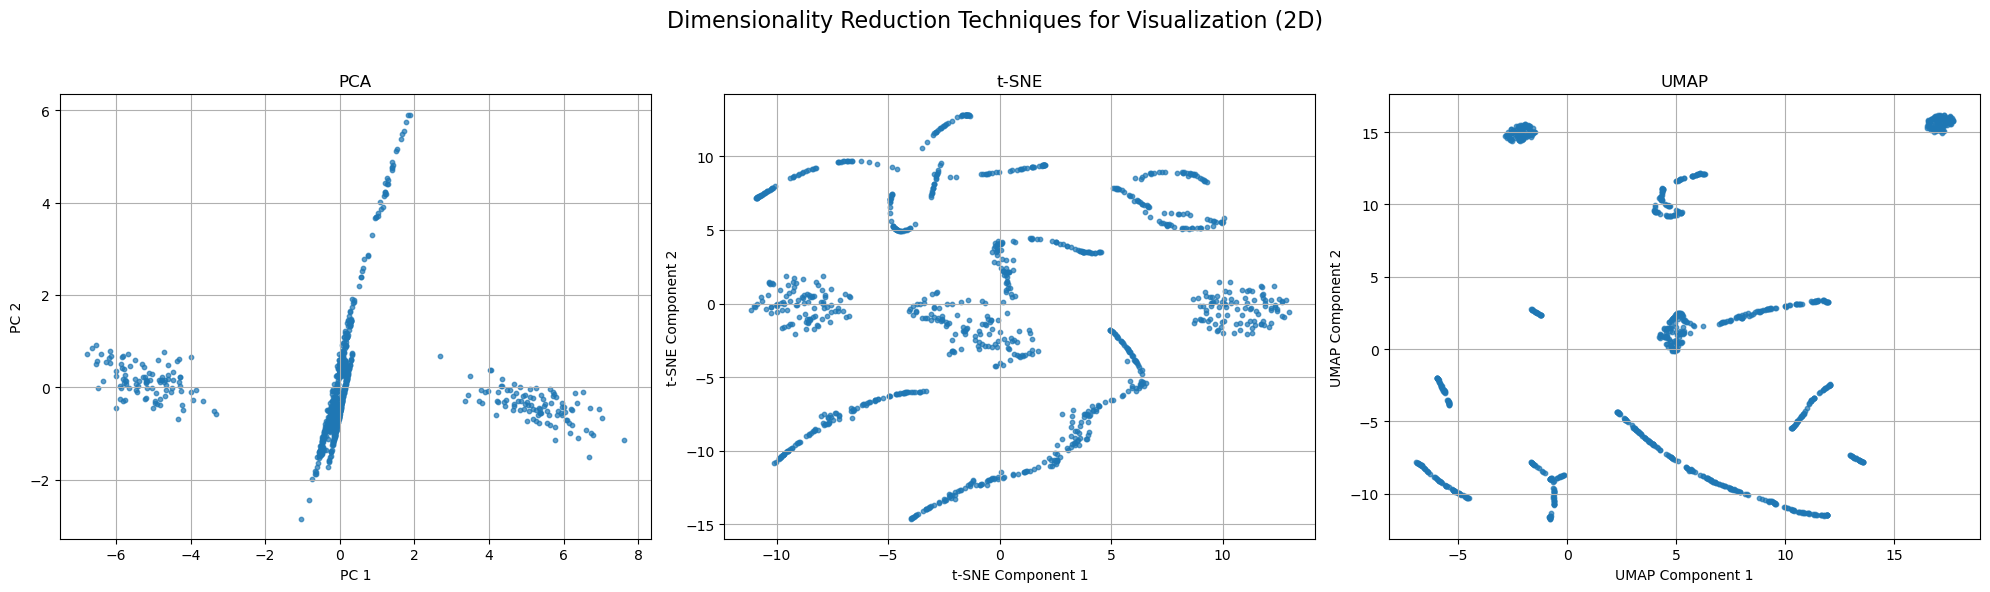


--- Comparing K-Means (k=5) on different data representations ---
Original Scaled Data: Silhouette=0.429, Davies-Bouldin=0.727
PCA-Reduced Data (2D): Silhouette=0.675, Davies-Bouldin=0.337
UMAP-Reduced Data (2D): Silhouette=0.593, Davies-Bouldin=0.599

Note: The 'best' number of clusters (k) should ideally be determined for each data representation separately.
The above is a simplified comparison for a fixed k.
Visualizing the clusters on the 2D plots can also be insightful.


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


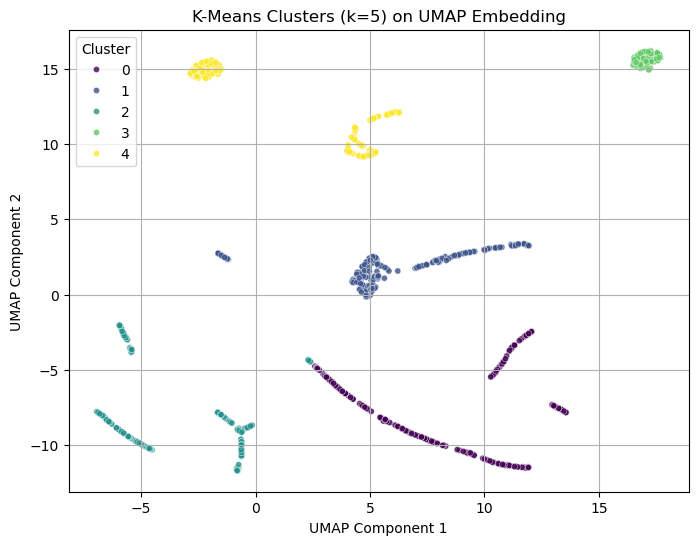

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap # UMAP is a separate package: pip install umap-learn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
try:
    df = pd.read_csv('challenge.txt', sep='\t', header=None)
    # Assign generic column names if your data doesn't have a header
    df.columns = [f'feature_{i}' for i in range(df.shape[1])]
except FileNotFoundError:
    print("Error: 'challenge.txt' not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

print("Dataset shape:", df.shape)
print("Dataset head:\n", df.head())

# --- 1. Data Preprocessing: Scaling ---
# It's generally good practice to scale data before PCA, t-SNE, UMAP, and clustering
X = df.values
X_scaled = StandardScaler().fit_transform(X)

# --- 2. Dimensionality Reduction for Visualization (to 2D) ---
n_components_2d = 2

# PCA
print("\nRunning PCA...")
pca = PCA(n_components=n_components_2d, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print(f"PCA explained variance ratio for {n_components_2d} components: {pca.explained_variance_ratio_.sum():.4f}")

# t-SNE
# t-SNE can be slow on large datasets. Perplexity is an important parameter.
# Typical values for perplexity are between 5 and 50.
print("\nRunning t-SNE (this might take a while)...")
tsne = TSNE(n_components=n_components_2d, perplexity=30, n_iter=300, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X_scaled)

# UMAP
# n_neighbors controls how UMAP balances local versus global structure.
# min_dist controls how tightly UMAP is allowed to pack points together.
print("\nRunning UMAP...")
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=n_components_2d, random_state=42, metric='euclidean')
X_umap = reducer.fit_transform(X_scaled)

# --- 3. Visualization of Embeddings ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Dimensionality Reduction Techniques for Visualization (2D)', fontsize=16)

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.7)
axes[0].set_title('PCA')
axes[0].set_xlabel('PC 1')
axes[0].set_ylabel('PC 2')
axes[0].grid(True)

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.7)
axes[1].set_title('t-SNE')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')
axes[1].grid(True)

axes[2].scatter(X_umap[:, 0], X_umap[:, 1], s=10, alpha=0.7)
axes[2].set_title('UMAP')
axes[2].set_xlabel('UMAP Component 1')
axes[2].set_ylabel('UMAP Component 2')
axes[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
plt.show()

# --- 4. Impact of Dimensionality Reduction on Clustering (Example with K-Means) ---
# Let's assume we are trying to find a certain number of clusters, e.g., k=5 for demonstration
# You would typically determine k using methods like the elbow method or silhouette analysis
k_clusters = 5 # Example number of clusters

print(f"\n--- Comparing K-Means (k={k_clusters}) on different data representations ---")

# K-Means on original scaled data
kmeans_orig = KMeans(n_clusters=k_clusters, random_state=42, n_init='auto')
labels_orig = kmeans_orig.fit_predict(X_scaled)
if len(np.unique(labels_orig)) > 1:
    sil_orig = silhouette_score(X_scaled, labels_orig)
    db_orig = davies_bouldin_score(X_scaled, labels_orig)
    print(f"Original Scaled Data: Silhouette={sil_orig:.3f}, Davies-Bouldin={db_orig:.3f}")
else:
    print("Original Scaled Data: Not enough distinct clusters for metrics.")


# K-Means on PCA-reduced data (using the 2D PCA for this example, or choose more components)
# For a more robust comparison, you might use PCA to reduce to a slightly higher number of dimensions
# if those dimensions capture significant variance, e.g., PCA to 5 components.
# Here we use the X_pca (2D) for consistency with the visualization.
if X_pca.shape[1] >= 2 and len(np.unique(kmeans_orig.predict(X_scaled))) > 1 : # Ensure enough components for Kmeans
    kmeans_pca = KMeans(n_clusters=k_clusters, random_state=42, n_init='auto')
    labels_pca_km = kmeans_pca.fit_predict(X_pca)
    if len(np.unique(labels_pca_km)) > 1:
        sil_pca = silhouette_score(X_pca, labels_pca_km)
        db_pca = davies_bouldin_score(X_pca, labels_pca_km)
        print(f"PCA-Reduced Data ({X_pca.shape[1]}D): Silhouette={sil_pca:.3f}, Davies-Bouldin={db_pca:.3f}")
    else:
        print(f"PCA-Reduced Data ({X_pca.shape[1]}D): Not enough distinct clusters for metrics.")


# K-Means on UMAP-reduced data (using the 2D UMAP embedding)
if X_umap.shape[1] >=2 and len(np.unique(kmeans_orig.predict(X_scaled))) > 1: # Ensure enough components for Kmeans
    kmeans_umap = KMeans(n_clusters=k_clusters, random_state=42, n_init='auto')
    labels_umap_km = kmeans_umap.fit_predict(X_umap)
    if len(np.unique(labels_umap_km)) > 1:
        sil_umap = silhouette_score(X_umap, labels_umap_km)
        db_umap = davies_bouldin_score(X_umap, labels_umap_km)
        print(f"UMAP-Reduced Data ({X_umap.shape[1]}D): Silhouette={sil_umap:.3f}, Davies-Bouldin={db_umap:.3f}")
    else:
        print(f"UMAP-Reduced Data ({X_umap.shape[1]}D): Not enough distinct clusters for metrics.")

print("\nNote: The 'best' number of clusters (k) should ideally be determined for each data representation separately.")
print("The above is a simplified comparison for a fixed k.")
print("Visualizing the clusters on the 2D plots can also be insightful.")

# Example: Visualize K-Means clusters on UMAP embedding
if 'labels_umap_km' in locals() and len(np.unique(labels_umap_km)) > 1:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels_umap_km, palette='viridis', s=20, alpha=0.8)
    plt.title(f'K-Means Clusters (k={k_clusters}) on UMAP Embedding')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

## Original Dataset Head:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.768094  -1.062899  -1.502895        0.0        0.0        0.0   
1  -1.326407  -0.725706  -1.436839        0.0        0.0        0.0   
2  -0.870501  -0.944614  -0.796163        0.0        0.0        0.0   
3  -1.198228  -0.633996  -1.031985        0.0        0.0        0.0   
4  -0.581253  -0.839979  -0.762256        0.0        0.0        0.0   

   feature_6  feature_7  feature_8  feature_9  
0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0  

Dataset shape: (1000, 10)

--- Applying Outlier Detection Methods ---

Identifying outliers using IQR method (feature-wise):
  Feature 'feature_0': No outliers found.
  Feature 'feature_1': No outliers found.
  Feature 'feature_2': Found 2 outliers.
  Featur

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

Optimal k based on Silhouette Score (range range(2, 10)): 2 (Max Score: 0.523)
Data clustered into 2 clusters using K-Means.
Cluster distribution:
 cluster_kmeans
0    900
1    100
Name: count, dtype: int64

--- Cluster Description ---

Mean feature values per K-Means cluster:
                feature_0  feature_1  feature_2  feature_3  feature_4
cluster_kmeans                                                       
0                8.341010  15.451897  -0.103157  -0.104070  -0.102257
1               20.930913  20.932930   0.928417   0.936631   0.920309


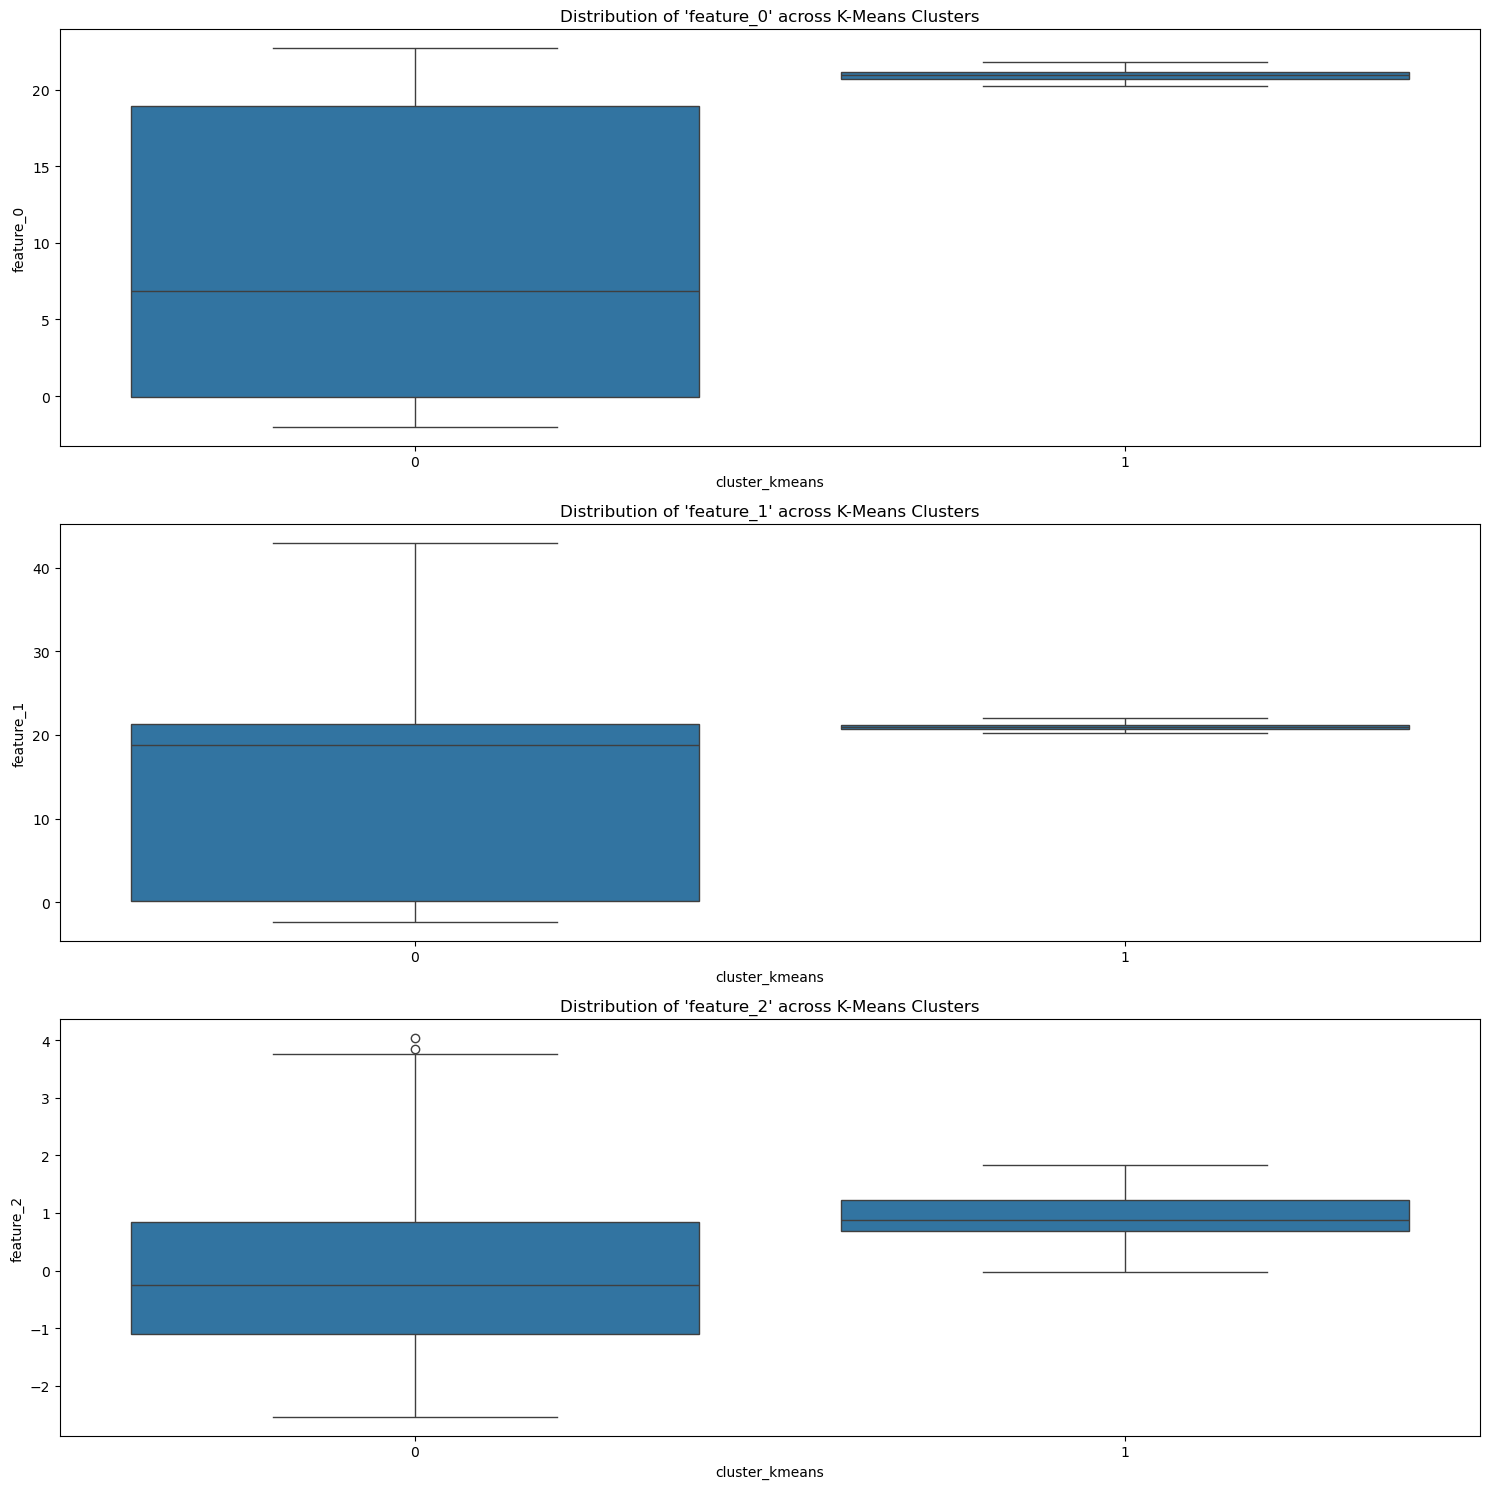


Interpreting Clusters (Example based on means):

Cluster 0:
  Size: 900 points
  Centroid (mean of first 5 features): 
feature_0     8.341010
feature_1    15.451897
feature_2    -0.103157
feature_3    -0.104070
feature_4    -0.102257
Name: 0, dtype: float64

Cluster 1:
  Size: 100 points
  Centroid (mean of first 5 features): 
feature_0    20.930913
feature_1    20.932930
feature_2     0.928417
feature_3     0.936631
feature_4     0.920309
Name: 1, dtype: float64


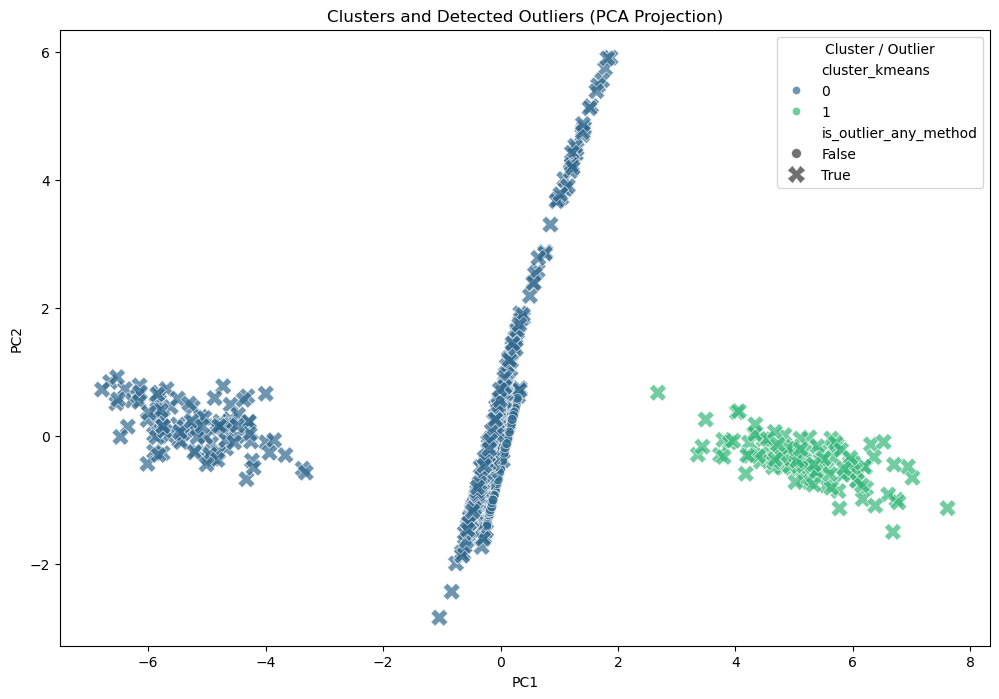


--- Robustness Evaluation of Outlier Detection Techniques ---
This section is discussed in the accompanying text. Key aspects include:
- IQR: Robust to extreme values for univariate analysis but misses multivariate outliers.
- Isolation Forest: Generally robust, good for high-D, less sensitive to feature scaling than distance methods.
- LOF: Moderately robust, sensitive to 'n_neighbors', good for local density anomalies.
- One-Class SVM: Sensitivity to 'nu' and kernel parameters; models a boundary for 'normal' data.
Comparing outputs and considering the data's block-like structure in 'challenge.txt' is crucial.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA # For visualization
from sklearn.metrics import silhouette_score # For choosing k in KMeans

# --- 1. Load and Prepare Data ---
try:
    df = pd.read_csv('challenge.txt', sep='\t', header=None)
    # Assign generic column names
    df.columns = [f'feature_{i}' for i in range(df.shape[1])]
except FileNotFoundError:
    print("Error: 'challenge.txt' not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

print("## Original Dataset Head:")
print(df.head())

# Scale the data (important for many outlier detection and clustering algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X_scaled, columns=df.columns)

print(f"\nDataset shape: {df.shape}")

# --- 2. Outlier Detection Methods ---
print("\n--- Applying Outlier Detection Methods ---")

# Method 1: Interquartile Range (IQR) - Applied feature-wise
outliers_iqr_indices = {}
df_iqr_outliers = pd.DataFrame(index=df.index)
df_iqr_outliers['is_outlier_iqr_any_feature'] = False

print("\nIdentifying outliers using IQR method (feature-wise):")
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    feature_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_iqr_indices[column] = feature_outliers.index
    if not feature_outliers.empty:
        print(f"  Feature '{column}': Found {len(feature_outliers)} outliers.")
        df_iqr_outliers.loc[feature_outliers.index, 'is_outlier_iqr_any_feature'] = True
    else:
        print(f"  Feature '{column}': No outliers found.")

total_iqr_outliers = df_iqr_outliers['is_outlier_iqr_any_feature'].sum()
print(f"Total data points flagged as outliers by IQR in at least one feature: {total_iqr_outliers} ({total_iqr_outliers/len(df)*100:.2f}%)")


# Method 2: Isolation Forest
print("\nIdentifying outliers using Isolation Forest:")
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
df['outlier_iso_forest'] = iso_forest.fit_predict(X_scaled)
df['outlier_iso_forest'] = df['outlier_iso_forest'].map({1: 0, -1: 1}) # 1 for outlier, 0 for inlier
print(f"  Isolation Forest flagged {df['outlier_iso_forest'].sum()} outliers ({df['outlier_iso_forest'].sum()/len(df)*100:.2f}%)")

# Method 3: Local Outlier Factor (LOF)
print("\nIdentifying outliers using Local Outlier Factor (LOF):")
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
df['outlier_lof'] = lof.fit_predict(X_scaled)
df['outlier_lof'] = df['outlier_lof'].map({1: 0, -1: 1}) # 1 for outlier, 0 for inlier
print(f"  LOF flagged {df['outlier_lof'].sum()} outliers ({df['outlier_lof'].sum()/len(df)*100:.2f}%)")

# Method 4: One-Class SVM
print("\nIdentifying outliers using One-Class SVM:")
one_class_svm = OneClassSVM(nu=0.05, kernel="rbf", gamma='auto')
df['outlier_svm'] = one_class_svm.fit_predict(X_scaled)
df['outlier_svm'] = df['outlier_svm'].map({1: 0, -1: 1}) # 1 for outlier, 0 for inlier
print(f"  One-Class SVM flagged {df['outlier_svm'].sum()} outliers ({df['outlier_svm'].sum()/len(df)*100:.2f}%)")

print("\nSummary of identified outliers by each method (first 10 rows with any outlier flag):")
outlier_summary_cols = ['outlier_iso_forest', 'outlier_lof', 'outlier_svm']
df['is_outlier_iqr'] = df_iqr_outliers['is_outlier_iqr_any_feature']
outlier_summary_cols.append('is_outlier_iqr')

df['is_outlier_any_method'] = df[outlier_summary_cols].sum(axis=1) > 0
# Display only the first 5 original features and the outlier flags for brevity
display_cols_outliers = df.columns[:5].tolist() + outlier_summary_cols
print(df[df['is_outlier_any_method']].head(10)[display_cols_outliers])
print(f"\nTotal points flagged as outliers by at least one ML method or IQR: {df['is_outlier_any_method'].sum()}")

# --- 3. Perform Clustering (K-Means) ---
print("\n--- Performing K-Means Clustering ---")
silhouette_scores = []
# Using a slightly expanded k_range for potentially better optimal_k selection
k_range_clustering = range(2, 10) # Test k from 2 to 9 clusters
for k_test in k_range_clustering:
    kmeans_test = KMeans(n_clusters=k_test, random_state=42, n_init='auto')
    labels_test = kmeans_test.fit_predict(X_scaled)
    if len(np.unique(labels_test)) > 1: # Ensure more than 1 cluster to calculate silhouette
        silhouette_scores.append(silhouette_score(X_scaled, labels_test))
    else:
        silhouette_scores.append(-1) # Penalize if only one cluster is formed

if silhouette_scores: # Check if list is not empty
    optimal_k = k_range_clustering[np.argmax(silhouette_scores)]
    print(f"Optimal k based on Silhouette Score (range {k_range_clustering}): {optimal_k} (Max Score: {max(silhouette_scores):.3f})")
else:
    optimal_k = 4 # Default if scores are problematic or only one k was tested and failed
    print(f"Could not determine optimal k through silhouette scores in the given range, defaulting to {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)
print(f"Data clustered into {optimal_k} clusters using K-Means.")
print("Cluster distribution:\n", df['cluster_kmeans'].value_counts().sort_index())

# --- 4. Cluster Description ---
print("\n--- Cluster Description ---")
# Use original feature values from df for description.
# df already contains original features, outlier flags, and now cluster labels.

# Calculate mean and median for each original feature, grouped by cluster
# This will create a MultiIndex DataFrame: (cluster_kmeans) on rows, (feature_name, statistic) on columns
feature_cols_for_agg = [col for col in df.columns if 'feature_' in col] # Select only original feature columns
cluster_stats_by_feature = df.groupby('cluster_kmeans')[feature_cols_for_agg].agg(['mean', 'median'])


# To get the mean values for each feature per cluster:
# Select 'mean' from the second level (level=1) of the column MultiIndex
if not cluster_stats_by_feature.empty: # Check if aggregation produced results
    print("\nMean feature values per K-Means cluster:")
    mean_cluster_features = cluster_stats_by_feature.xs('mean', level=1, axis=1)
    print(mean_cluster_features.iloc[:, :5]) # Show means for first 5 features

    # Example of accessing median values if needed:
    # median_cluster_features = cluster_stats_by_feature.xs('median', level=1, axis=1)
    # print("\nMedian feature values per K-Means cluster:")
    # print(median_cluster_features.iloc[:, :5])
else:
    print("Cluster statistics could not be generated (e.g., no clusters formed).")
    mean_cluster_features = pd.DataFrame() # Empty dataframe to avoid errors later


# Visualize feature distributions per cluster for a few key features
if optimal_k > 0 and not mean_cluster_features.empty: # Ensure clusters were formed and means calculated
    example_features_for_plot = df.columns[:3].tolist()
    plt.figure(figsize=(15, 5 * len(example_features_for_plot)))
    for i, feature in enumerate(example_features_for_plot):
        plt.subplot(len(example_features_for_plot), 1, i + 1)
        sns.boxplot(x='cluster_kmeans', y=feature, data=df) # Use df which has original values and cluster labels
        plt.title(f"Distribution of '{feature}' across K-Means Clusters")
    plt.tight_layout()
    plt.show()

    print("\nInterpreting Clusters (Example based on means):")
    for i in range(optimal_k):
        print(f"\nCluster {i}:")
        # Get the mean values for this specific cluster 'i' from the pre-calculated means
        if i in mean_cluster_features.index:
            cluster_data_mean_series = mean_cluster_features.loc[i]
            print(f"  Size: {df['cluster_kmeans'].value_counts().get(i, 0)} points")
            print(f"  Centroid (mean of first 5 features): \n{cluster_data_mean_series.head()}")
        else:
            print(f"  Cluster {i} not found in mean_cluster_features (possibly empty or not formed).")
        # Further detailed description would involve looking at the means/medians of all features
        # and how they differ from other clusters and the global mean.
else:
    if optimal_k <= 0:
        print("No clusters were formed or optimal_k is not positive, skipping detailed cluster description plots.")
    if mean_cluster_features.empty and optimal_k > 0 :
        print("Mean cluster features are empty, skipping detailed cluster description plots.")


# --- Optional: Visualize Outliers and Clusters in 2D (using PCA) ---
if optimal_k > 0:
    pca_2d = PCA(n_components=2, random_state=42)
    X_pca_2d = pca_2d.fit_transform(X_scaled) # Use the scaled data for PCA
    df_pca_2d = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
    df_pca_2d['cluster_kmeans'] = df['cluster_kmeans'].values # Ensure correct alignment
    df_pca_2d['is_outlier_any_method'] = df['is_outlier_any_method'].values # Ensure correct alignment

    plt.figure(figsize=(12, 8))
    # Check if there are any outliers to style differently
    if df_pca_2d['is_outlier_any_method'].any():
        sns.scatterplot(x='PC1', y='PC2', hue='cluster_kmeans', style='is_outlier_any_method',
                        size='is_outlier_any_method', sizes=(150, 50), # Larger size for outliers
                        palette=sns.color_palette('viridis', n_colors=optimal_k),
                        data=df_pca_2d, alpha=0.7)
    else: # Plot without style/size for outliers if none are present
        sns.scatterplot(x='PC1', y='PC2', hue='cluster_kmeans',
                        palette=sns.color_palette('viridis', n_colors=optimal_k),
                        data=df_pca_2d, alpha=0.7)
        print("\nNo outliers flagged by 'is_outlier_any_method' to style differently in PCA plot.")

    plt.title('Clusters and Detected Outliers (PCA Projection)')
    plt.legend(title='Cluster / Outlier')
    plt.show()
else:
    print("No clusters formed, skipping PCA visualization of clusters.")

# --- 5. Robustness Evaluation (Discussion in Markdown) ---
# This part is primarily discussion based on the known properties of the algorithms
# and observations from the data. It will be provided in the text accompanying the code.
print("\n--- Robustness Evaluation of Outlier Detection Techniques ---")
print("This section is discussed in the accompanying text. Key aspects include:")
print("- IQR: Robust to extreme values for univariate analysis but misses multivariate outliers.")
print("- Isolation Forest: Generally robust, good for high-D, less sensitive to feature scaling than distance methods.")
print("- LOF: Moderately robust, sensitive to 'n_neighbors', good for local density anomalies.")
print("- One-Class SVM: Sensitivity to 'nu' and kernel parameters; models a boundary for 'normal' data.")
print("Comparing outputs and considering the data's block-like structure in 'challenge.txt' is crucial.")